<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/04_Darwin's_finches_A_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Darwin's finches: Case Study
</h1> 
</strong>

---

<p align='center'>
    <a href='#'><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Darwin%27s_finches_by_Gould.jpg/800px-Darwin%27s_finches_by_Gould.jpg'></a>
</p>

Every year for the past 40-plus years, **Peter** and **Rosemary Grant** have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using EDA and statistical inference, we will witness first hand, through data, evolution in action.

We will be comparing Darwin's finches beck length and depth measurement collected in 1975 with 2012's data. The changes in the beck's dimension in these 37 years, will help us derive evolution in the particular species.

For our affirmation, to prove evolution, we will use statistics method like bootstrapping, parameter estimation and hypothesis test.



###__Clone the repository__ 

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 2037 (delta 78), reused 103 (delta 27), pack-reused 1857
Receiving objects: 100% (2037/2037), 220.76 MiB | 21.03 MiB/s, done.
Resolving deltas: 100% (730/730), done.
Checking out files: 100% (863/863), done.


In [2]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### __Change the current working directory__

In [3]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/23_Statistical-Thinking-in-Python-[Part -2]/_datasets') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd)

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/23_Statistical-Thinking-in-Python-[Part -2]/_datasets


In [4]:
ls

anscombe.csv                   fortis_beak_depth_heredity.csv
bee_sperm.csv                  frog_tongue.csv
female_literacy_fertility.csv  mlb_nohitters.csv
finch_beaks_1975.csv           scandens_beak_depth_heredity.csv
finch_beaks_2012.csv           sheffield_weather_station.csv


### __EDA of beak depths of Darwin's finches__







For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species __Geospiza scandens__ has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.



In [5]:
# Loading the data into the pandas dataframe
finch_1975 =pd.read_csv("finch_beaks_1975.csv")
finch_2012 =pd.read_csv("finch_beaks_2012.csv")

# ${1.}$ __`finch_beaks_1975`__

In [6]:
finch_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [7]:
finch_beaks_1975 = finch_1975.drop(['band'], axis = 'columns')

finch_beaks_1975['year'] = "1975"
finch_beaks_1975.rename(columns={'Beak depth, mm' : 'bdepth',
                                 'Beak length, mm' : 'blength'},
                        inplace=True
                        )

finch_beaks_1975.head()

,species,blength,bdepth,year
0,fortis,9.4,8.0,1975
1,fortis,9.2,8.3,1975
2,fortis,9.5,7.5,1975
3,fortis,9.5,8.0,1975
4,fortis,11.5,9.9,1975


# ${2.}$ __`finch_beaks_2012`__

In [8]:
finch_2012.head()

,band,species,blength,bdepth
0,19022,fortis,10.0,8.5
1,19028,fortis,12.5,8.9
2,19032,fortis,9.3,7.5
3,19041,fortis,10.3,9.6
4,19044,fortis,11.0,9.2


In [9]:
finch_beaks_2012 = finch_2012.drop(['band'], axis = 'columns')
finch_beaks_2012['year'] = "2012"
finch_beaks_2012.head()

,species,blength,bdepth,year
0,fortis,10.0,8.5,2012
1,fortis,12.5,8.9,2012
2,fortis,9.3,7.5,2012
3,fortis,10.3,9.6,2012
4,fortis,11.0,9.2,2012


# ${3.}$ __`finch_beaks_con`__

In [10]:
finch_beaks_con = pd.concat([finch_beaks_1975, finch_beaks_2012]).reset_index(drop=True)
finch_beaks_con.head()

,species,blength,bdepth,year
0,fortis,9.4,8.0,1975
1,fortis,9.2,8.3,1975
2,fortis,9.5,7.5,1975
3,fortis,9.5,8.0,1975
4,fortis,11.5,9.9,1975


In [11]:
print('dataframe shape 1975 {}'.format(finch_beaks_1975.shape))
print('dataframe shape 2012 {}'.format(finch_beaks_2012.shape))
print('dataframe shape 1975-Concat-2012 {}'.format(finch_beaks_con.shape))

dataframe shape 1975 (403, 4)
dataframe shape 2012 (248, 4)
dataframe shape 1975-Concat-2012 (651, 4)


In [12]:
finch_beaks_con.describe()

,blength,bdepth
count,651.000000,651.000000
mean,11.588618,9.040952
std,1.659108,0.735171
min,8.700000,7.200000
25%,10.300000,8.500000
50%,11.000000,9.000000
75%,13.100000,9.600000
max,15.940000,11.100000


In [13]:
finch_beaks_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  651 non-null    object 
 1   blength  651 non-null    float64
 2   bdepth   651 non-null    float64
 3   year     651 non-null    object 
dtypes: float64(2), object(2)
memory usage: 20.5+ KB


In [14]:
finch_beaks_con.isna().sum()

species    0
blength    0
bdepth     0
year       0
dtype: int64

In [15]:
finch_beaks_con.species.value_counts()

fortis      437
scandens    214
Name: species, dtype: int64

# `fortis_f` & `scandens_f`

In [16]:
# dataframe on the basis of particular species
fortis_f = finch_beaks_con[finch_beaks_con.species == 'fortis'].reset_index(drop=True)
scandens_f = finch_beaks_con[finch_beaks_con.species == 'scandens'].reset_index(drop=True)

### ${Fortis}$

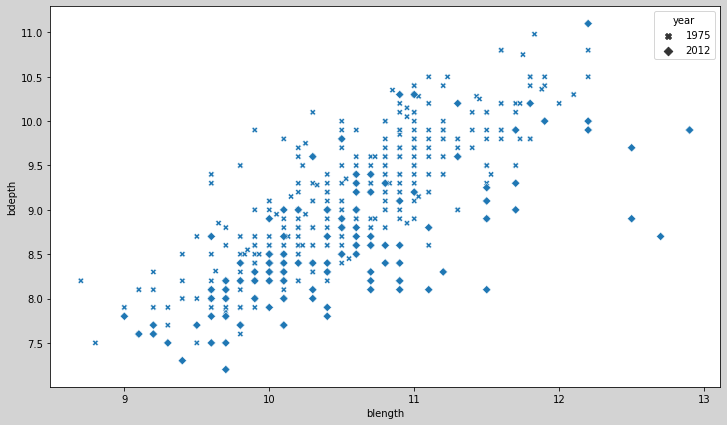

In [17]:
markers = {'1975': "X", '2012': "D"}
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')
_ = sns.scatterplot(x= 'blength', y= 'bdepth', style = 'year', markers=markers, data=fortis_f)
plt.show()

### ${Scandens}$

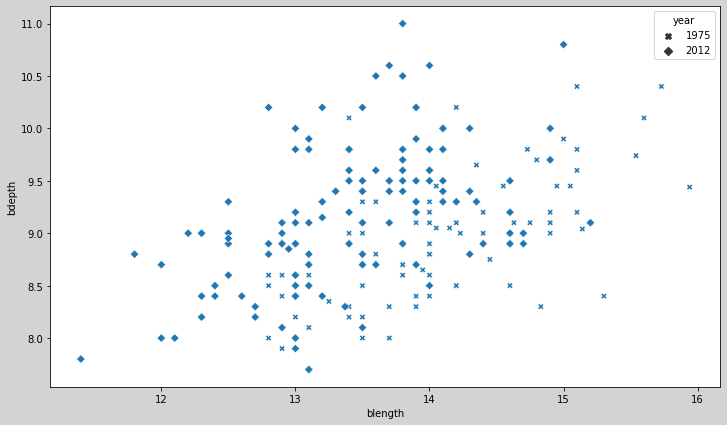

In [18]:
markers = {'1975': "X", '2012': "D"}
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')
_ = sns.scatterplot(x= 'blength', y= 'bdepth', style = 'year', markers=markers, data=scandens_f)
plt.show()

### $\color{red}{\textbf{NOTE:}}$ From the scatter plots, we can say that the **fortis** finch beck size **haven't changed** majorly. While the **scandens** finch beck has **changed over the time**. Therfore, we will be concentrating on the scandens species.

# ${Scandens}$

- __`scandens_1975`__
- __`scandens_2012`__
- __`scandens_beak_depth_1975`__
- __`scandens_beak_depth_2012`__
- __`scandens_beak_length_1975`__
- __`scandens_beak_length_2012`__

In [19]:
scandens_1975 = finch_beaks_1975[finch_beaks_1975['species']=='scandens']
scandens_2012 = finch_beaks_2012[finch_beaks_2012['species']=='scandens']

# depths of scandens beak
scandens_beak_depth_1975 = scandens_1975['bdepth'].reset_index(drop=True)
scandens_beak_depth_2012 = scandens_2012['bdepth'].reset_index(drop=True)

# lengths of scandens beak
scandens_beak_length_1975 = scandens_1975['blength'].reset_index(drop=True)
scandens_beak_length_2012 = scandens_2012['blength'].reset_index(drop=True)

## __Exploratory Data Analysis__

### __Swarmplot__ - ${Fortis}$ 

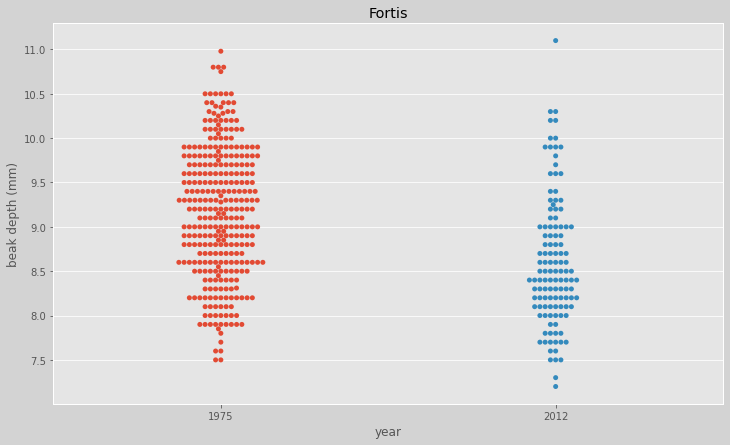

In [20]:
plt.style.use('ggplot')
# Create bee swarm plot
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')
_ = sns.swarmplot(x='year', y='bdepth', data=fortis_f)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
_ = plt.title('Fortis')
# Show the plot
plt.show()

### __Swarmplot__ - ${scandens}$ 

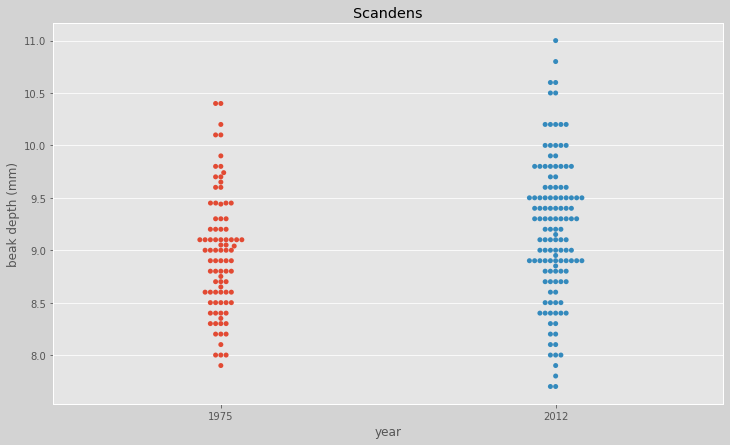

In [21]:
plt.style.use('ggplot')
# Create bee swarm plot
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')
_ = sns.swarmplot(x='year', y='bdepth', data=scandens_f)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')
_ = plt.title('Scandens')
# Show the plot
plt.show()

In [22]:
print('mean 1975: {}'.format(scandens_beak_depth_1975.mean()))
print('mean 2012: {}'.format(scandens_beak_depth_2012.mean()))

mean 1975: 8.96
mean 2012: 9.186220472440944


**Scandens** finch beck has changed over the time. Therfore, we will be concentrating on the **scandens species**.

It is kind of **hard to see if there is a clear difference between the 1975 and 2012 data set**. Eyeballing it, it appears as though the*** mean of the 2012 data set might be slightly higher***, and it might have a bigger variance.

### __Boxplot__ - ${scandens}$ 

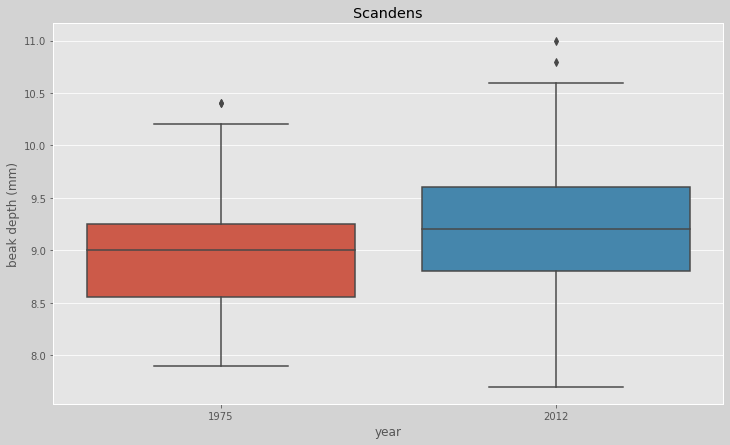

In [23]:
plt.style.use('ggplot')
# Create bee swarm plot
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')
_ = sns.boxplot(x='year', y='bdepth', data=scandens_f)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
_ = plt.title('Scandens')
plt.show()

### __ECDFs of beak depths__

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the `1975` and `2012` beak depth measurements on the same plot.

For your convenience, the beak depths for the respective years has been stored in the NumPy arrays `bd_1975` and `bd_2012`.

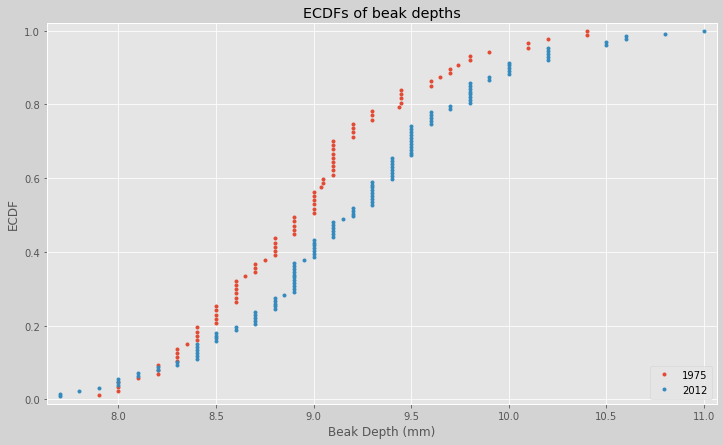

In [24]:
# Defining the Ecdf Func
def ecdf(data): 
    x = np.sort(data)  
    y = np.arange(1, len(x) + 1) / len(x) 
    return x, y

# Compute ECDFs scandens_beak_depth
x_1975, y_1975 = ecdf(scandens_beak_depth_1975)
x_2012, y_2012 = ecdf(scandens_beak_depth_2012)

# Style
plt.style.use('ggplot')
# plot size
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Setting up the margin
_ = plt.margins(0.02)
_ = plt.xlabel('Beak Depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')
_ = plt.title('ECDFs of beak depths')
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

<Figure size 864x504 with 0 Axes>

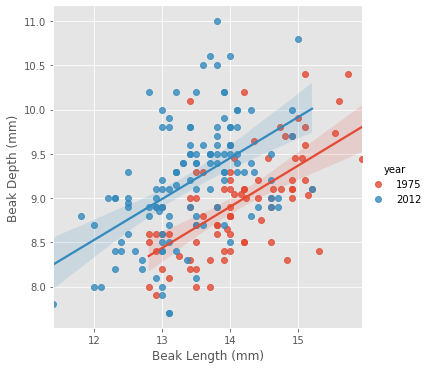

In [25]:
# Style
plt.style.use('ggplot')
# plot size
_ = plt.figure(figsize=(12, 7), facecolor='lightgrey')
_ = sns.lmplot(x='blength', y='bdepth', hue = 'year', data=scandens_f)
_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')

plt.show()

### Parameter estimates of beak depths

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.


```python
# Bootstrap replicate function
def bs_reps(data,func,size=1) :

    bs_rep = np.empty(size)

    for i in range(size) :
        bs_rep[i] = func(np.random.choice(data,size=len(data)))
    return bs_rep
```

In [26]:
# Define a function with call signature bootstrap_replicate_1d
def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# Define a function with call signature draw_bs_reps 
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Compute the difference of the both beak depth
mean_diff = np.mean(scandens_beak_depth_2012) - np.mean(scandens_beak_depth_1975)

# Now bootstrap both the depths using mean function for 10000 samples
bs_rep_1975 = draw_bs_reps(scandens_beak_depth_1975, np.mean, size=10000)
bs_rep_2012 = draw_bs_reps(scandens_beak_depth_2012, np.mean, size=10000)

# Compute the difference of the sample means
bootstrap_rep= bs_rep_2012 - bs_rep_1975

# Compute 95% confidence interval
conf_int = np.percentile(bootstrap_rep, [2.5, 97.5])

# Print the results
print('Difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

Difference of means = 0.2262204724409429 mm
95% confidence interval = [0.05682003 0.38826996] mm


## __Hypothesis test: Are beaks deeper in 2012?__

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

__Instructions__
- Make a concatenated array of the 1975 and 2012 beak depths and compute and store its mean.

- Shift `bd_1975` and `bd_2012` such that their means are equal to the one you just computed for the combined data set.

- Take 10,000 bootstrap replicates of the mean each for the 1975 and 2012 beak depths.

- Subtract the 1975 replicates from the 2012 replicates to get bootstrap replicates of the difference.

- Compute and print the p-value. The observed difference in means you computed in the last exercise is still in your namespace as `mean_diff`.

In [27]:
#Shifting the two data sets so that they have the same mean 
combined_mean = np.mean(np.concatenate((scandens_beak_depth_1975,scandens_beak_depth_2012)))

bd_1975_shift = scandens_beak_depth_1975 - np.mean(scandens_beak_depth_1975) + combined_mean
bd_2012_shift = scandens_beak_depth_2012 - np.mean(scandens_beak_depth_2012) + combined_mean

bs_rep_1975_shift = draw_bs_reps(bd_1975_shift,np.mean,size=10000)
bs_rep_2012_shift = draw_bs_reps(bd_2012_shift,np.mean,size=10000)

bs_shifted_mean_diff = bs_rep_2012_shift - bs_rep_1975_shift

#p value
p= np.sum(bs_shifted_mean_diff >= mean_diff) / len(bs_shifted_mean_diff)
print("p-value = ",p)


p-value =  0.0027


We get a p-value of 0.0039, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

### EDA of beak length and depth

The beak length data are stored as `bl_1975` and `bl_2012`, again with units of millimeters (mm). You still have the beak depth data stored in `bd_1975` and `bd_2012`. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

__Instructions__

Make a scatter plot of the 1975 data. Use the `color='blue'` keyword argument. Also use an `alpha=0.5` keyword argument to have transparency in case data points overlap.

Do the same for the 2012 data, but use the `color='red'` keyword argument.
Add a legend and label the axes.
Show your plot.

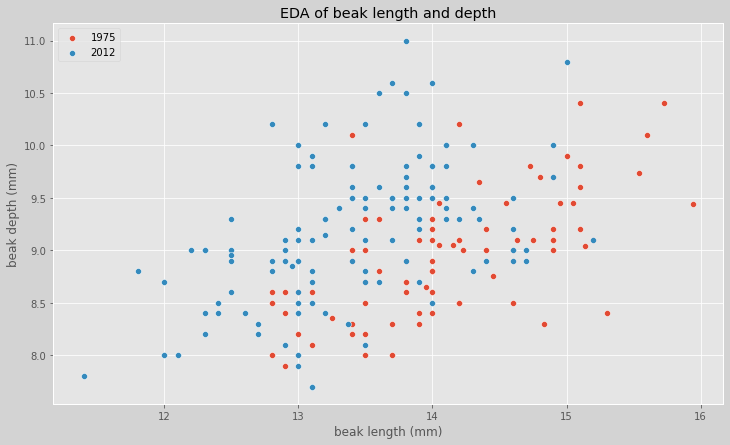

In [28]:
# filtering out the dataframe
scandens_1975 = finch_beaks_1975[finch_beaks_1975['species']=='scandens']
scandens_2012 = finch_beaks_2012[finch_beaks_2012['species']=='scandens']

# Style
plt.style.use('ggplot')

# plot size
plt.figure(figsize=(12, 7), facecolor='lightgrey')

# Make scatter plot of 1975 & 2012 data
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_1975)
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_2012)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')
_ = plt.title('EDA of beak length and depth')
plt.show()

In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

### Linear regressions

Perform a linear regression for both the 1975 and 2012 data. Then, perform **pairs bootstrap estimates** for the regression parameters. Report **95%** confidence intervals on the slope and intercept of the regression line.

We will use the `draw_bs_pairs_linreg()` function.


In [29]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

# Compute the linear regressions on the original data
slope_1975, intercept_1975 = np.polyfit(scandens_beak_length_1975,
                                       scandens_beak_depth_1975, 1)
slope_2012, intercept_2012 = np.polyfit(scandens_beak_length_2012,
                                       scandens_beak_depth_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975  = draw_bs_pairs_linreg(scandens_beak_length_1975,
                                                       scandens_beak_depth_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012  = draw_bs_pairs_linreg(scandens_beak_length_2012,
                                                       scandens_beak_depth_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

# Print the results
print('1975: slope =', slope_1975, 'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975, 'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012, 'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012, 'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.3275324  0.58913314]
1975: intercept = 2.3908752365842263 conf int = [0.67447008 4.3135168 ]
2012: slope = 0.462630358835313 conf int = [0.33922286 0.59677862]
2012: intercept = 2.9772474982360198 conf int = [1.22818629 4.62853145]


They have the same slope, but different intercepts.

### Displaying the linear regression results

Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise.

To do this, take the first 100 bootstrap samples (stored in `bs_slope_reps_1975`, `bs_intercept_reps_1975`, `bs_slope_reps_2012`, and `bs_intercept_reps_2012`) and plot the lines with `alpha=0.2` and `linewidth=0.5` keyword arguments to `plt.plot()`

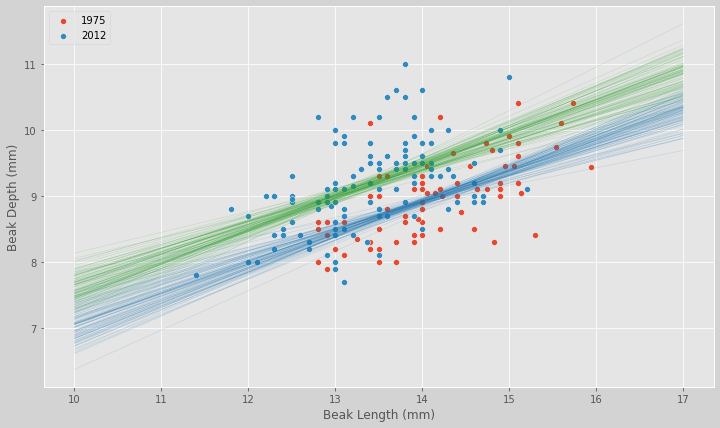

In [30]:
# Selecting the dataframe on the basis of species==scandens 
scandens_1975 = finch_beaks_1975[finch_beaks_1975['species']=='scandens']
scandens_2012 = finch_beaks_2012[finch_beaks_2012['species']=='scandens']

# plot size
plt.figure(figsize=(12, 7), facecolor='lightgrey')
# plot style
plt.style.use('ggplot')

# Make scatter plot of 1975 & 2012 data
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_1975)
_ = sns.scatterplot(x= 'blength', y= 'bdepth',  data=scandens_2012)

_ = plt.xlabel('Beak Length (mm)')
_ = plt.ylabel('Beak Depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='tab:blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='tab:green')

# Draw the plot again
plt.show()

### Beak length to depth ratio

The **linear regressions** showed interesting information about the beak geometry. The **slope** was the **same** in `1975` and `2012`, $\color{green}{\textbf{Suggesting}}$ that ***for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years***.

However, if we are interested in the **shape** of the beak, **we want to compare the ratio of beak length to beak depth**. Let's make that comparison.

Remember, the data are stored in

- __`scandens_beak_depth_1975`__
- __`scandens_beak_depth_2012`__
- __`scandens_beak_length_1975`__
- __`scandens_beak_length_2012`__



__Instructions__

- Make arrays of the beak length to depth ratio of each bird for 1975 and for 2012.

- Compute the mean of the length to depth ratio for 1975 and for 2012.

- Generate 10,000 bootstrap replicates each for the mean ratio for 1975 and 2012 using your `draw_bs_reps()` function.

- Get a 99% bootstrap confidence interval for the length to depth ratio for 1975 and 2012.

1975: mean ratio = 1.5788823771858533 conf int = [1.55657591 1.60124877]
2012: mean ratio = 1.4658342276847778 conf int = [1.44430232 1.48843511]


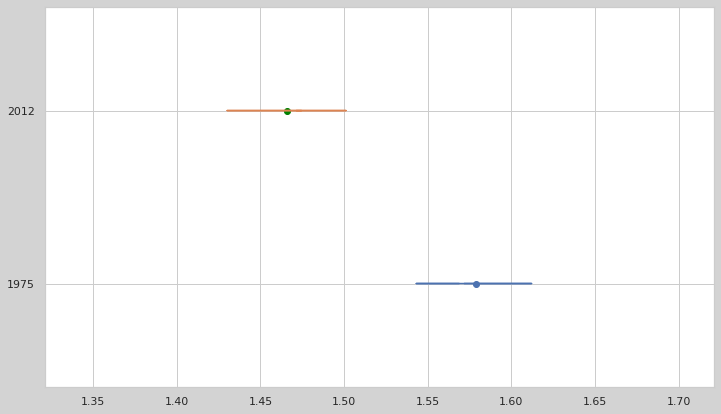

In [31]:
# depths of scandens beak
scandens_beak_depth_1975 = scandens_1975['bdepth'].reset_index(drop=True)
scandens_beak_depth_2012 = scandens_2012['bdepth'].reset_index(drop=True)

# lengths of scandens beak
scandens_beak_length_1975 = scandens_1975['blength'].reset_index(drop=True)
scandens_beak_length_2012 = scandens_2012['blength'].reset_index(drop=True)

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

# Compute length-to-depth ratios
ratio_1975 = scandens_beak_length_1975 / scandens_beak_depth_1975
ratio_2012 = scandens_beak_length_2012 / scandens_beak_depth_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

sns.set_theme(style='whitegrid')
_ = plt.figure(figsize=(12,7), facecolor='lightgrey')
_ = plt.plot(mean_ratio_1975, 1975, 'ro', color = 'b')
_ = plt.plot(mean_ratio_2012, 2012, 'ro', color = 'green')

y_1975 = np.full((10000), 1975)
_ = plt.plot(bs_replicates_1975, y_1975)

y_2012 = np.full((10000), 2012)
_ = plt.plot(bs_replicates_2012, y_2012)

_ = plt.yticks([1975, 2012])
_ = plt.margins(0.6)

plt.show()

### __How different is the ratio?__

In the above exercise, we computed the mean ***beak length to depth ratio*** with 99% confidence intervals for 1975 and for 2012. The results of that calculation are shown graphically in the plot above accompanying this problem. In addition to these results, 

__what would you say about the ratio of beak length to depth?__

$\color{red}{\textbf{Answer:}}$ 

>The __mean__ beak __length-to-depth__ ratio decreased by about `0.1`, or `7%`, from `1975` to `2012`. The `99%` **confidence intervals** are not even close to overlapping, so **this is a real change**. The beak shape changed.


# __Calculation of heritability__



__What is causing the beaks of Geospiza scandens to get bigger over time?__
 
- Might be the selective pressure brought on by the drought.

- ***But why do some birds have such large beaks to begin with?*** A prevailing explanation is that scandens birds are **mating the other major finch species on Daphne Major, Geopsiza fortis**.

These hybrid birds then mate with pure scandens, in a process called **introgressive hybridization**, which can bring fortis characteristics into the scandens species. This is similar to what likely happened to humans when they encountered neanderthals. In order assess the viability of this explanation,

__Heredity__

we need to know how strongly parental traits are passed on to offspring. In this last set of exercises, we will investigate the extent to which parental beak depth is inherited by offspring in both __scandens__ and __fortis__. You are applying your new statistical skills to a real, fundamental scientific problem.

### EDA of heritability

The array `bd_parent_scandens` contains the average beak depth (in mm) of two parents of the species `G. scandens`. The array `bd_offspring_scandens` contains the average beak depth of the offspring of the respective parents. The arrays `bd_parent_fortis` and `bd_offspring_fortis` contain the same information about measurements from G. fortis birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the `alpha=0.5` keyword argument to help you see overlapping points.



In [32]:
# Loading the heredity data for fortis and scandens into the pandas Dataframe
fortis_bd_heredity = pd.read_csv('fortis_beak_depth_heredity.csv')
scandens_bd_heredity = pd.read_csv('scandens_beak_depth_heredity.csv')

In [33]:
fortis_bd_heredity.columns

Index(['Mid-offspr', 'Male BD', 'Female BD'], dtype='object')

In [34]:
# calculating the median for 'Male BD'+'Female BD' as 'mid_parent'
fortis_bd_heredity['mid_parent'] = (fortis_bd_heredity['Male BD'] + fortis_bd_heredity['Female BD'])/2

# Droping 'Male BD', 'Female BD' columns
fortis_bd_heredity.drop(['Male BD', 'Female BD'], axis=1, inplace=True)

# Renaming 'Mid-offspr' as 'mid_offspring'
fortis_bd_heredity.rename(columns={'Mid-offspr':'mid_offspring'}, inplace=True)

In [35]:
fortis_bd_heredity.head()

,mid_offspring,mid_parent
0,10.70,10.100
1,9.78,9.550
2,9.48,9.400
3,9.60,10.250
4,10.27,10.125


In [36]:
scandens_bd_heredity.head()

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215


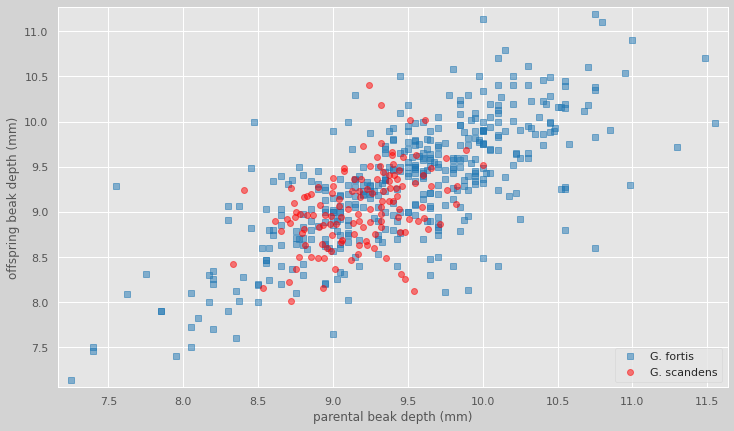

In [37]:
# Sub-Setting dataframe 
bd_parent_fortis = fortis_bd_heredity['mid_parent']
bd_offspring_fortis = fortis_bd_heredity['mid_offspring']
bd_parent_scandens = scandens_bd_heredity['mid_parent']
bd_offspring_scandens = scandens_bd_heredity['mid_offspring']

# Setting the plot size and style
#sns.set_theme(style='whitegrid')
plt.style.use('ggplot')
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='s', linestyle='none', color='tab:blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='o', linestyle='none', color='red', alpha=0.5)

# Set margins, make legend, label axes, and show plot
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in **G. fortis** than in **G. scandens**. This suggests that ***beak depth is more strongly inherited*** in **G. fortis**. We'll **quantify this correlation** next.

### Correlation of offspring and parental data

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

We have already written a function to do **pairs bootstrap** ***to get estimates for parameters derived from linear regression***. 

__Task__
>Our task is to make a new function with call signature `draw_bs_pairs(x, y, func, size=1)` that performs pairs bootstrap and computes a single statistic on pairs samples defined. The statistic of interest is computed by calling `func(bs_x, bs_y)`. 

__Instructions__

- Set up an array of indices to sample from. (Remember, when doing pairs bootstrap, we randomly choose indices and use those to get the pairs.)

- Initialize the array of bootstrap replicates. This should be a one-dimensional array of length `size`.

- Write a `for` loop to draw the samples.

- Randomly choose indices from the array of indices you previously set up.

- Extract `x` values and `y` values from the input array using the indices you just chose to generate a bootstrap sample.

- Use `func` to compute the statistic of interest from the bootstrap samples of `x` and `y` and store it in your array of bootstrap replicates.

- Return the array of bootstrap replicates.

In [38]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [39]:
help(draw_bs_pairs)

Help on function draw_bs_pairs in module __main__:

draw_bs_pairs(x, y, func, size=1)
    Perform pairs bootstrap for single statistic.



### Pearson correlation of offspring and parental data

The ***Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring***. 

Compute the **Pearson correlation coefficient** between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

- Acquire **1000 pairs bootstrap replicates** of the **Pearson correlation coefficient** using the `draw_bs_pairs()` function you wrote in the previous exercise for G. scandens and G. fortis.

- Compute the 95% confidence interval for both using your bootstrap replicates.



In [40]:
# Func: Pearson_
def pearson_r(x, y): 
    """Compute Pearson correlation coefficient between two arrays 
     
    Args: 
        x: arrays 
        y: arrays 
         
    returns: 
        r: int 
    """ 
    # Compute correlation matrix: corr_mat 
    corr_mat = np.corrcoef(x, y) 
     
    # Return entry[0, 1] 
    return corr_mat[0, 1]

# Func: draw_bs_pairs
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

# Sub-Setting dataframe 
bd_parent_scandens = scandens_bd_heredity['mid_parent']
bd_offspring_scandens = scandens_bd_heredity['mid_offspring']
bd_parent_fortis = fortis_bd_heredity['mid_parent']
bd_offspring_fortis = fortis_bd_heredity['mid_offspring']

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, pearson_r, size=1000)
bs_replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, pearson_r, size=1000)

# Compute the 95% confidence interval for both using your bootstrap replicates.
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.26179293 0.53540979]
G. fortis: 0.7283412395518487 [0.66863193 0.77817694]


It is clear from the confidence intervals that beak depth of the offspring of `G. fortis` parents is more strongly correlated with their offspring than their `G. scandens` counterparts.

### Measuring heritability

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.



__Instructions__

- Write a function `heritability(parents, offspring)` that computes heritability defined as the ***ratio of the covariance of the trait in parents and offspring divided by the variance of the trait in the parents***.

- Use this function to compute the heritability for `G. scandens` and `G. fortis`.

- Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap for G. scandens and G. fortis.

- Compute the 95% confidence interval for both using your bootstrap replicates.

- Print the results.

In [41]:
# Measuring heritability
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Func: draw_bs_pairs
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for single statistic."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

# Sub-Setting dataframe 
bd_parent_scandens = scandens_bd_heredity['mid_parent']
bd_offspring_scandens = scandens_bd_heredity['mid_offspring']
bd_parent_fortis = fortis_bd_heredity['mid_parent']
bd_offspring_fortis = fortis_bd_heredity['mid_offspring']

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of the heritability using pairs bootstrap
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)

# Compute the 95% confidence interval for both using your bootstrap replicates.
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.34916566 0.75001376]
G. fortis: 0.7229051911438159 [0.64669981 0.80481233]


$\color{green}{\textbf{Result-Interpretation}}$

>Here again, we see that `G. fortis` has **stronger heritability** than `G. scandens`. This suggests that the **traits** of `G. fortis` may be **strongly incorporated** into `G. scandens` by **introgressive hybridization**

__Is beak depth heritable at all in G. scandens?__

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.


__Instructions__

- Initialize your array of replicates of heritability. We will take 10,000 pairs permutation replicates.

- Write a `for` loop to generate your replicates.
    - Permute the `bd_parent_scandens` array using `np.random.permutation()`.

    - Compute the heritability between the permuted array and the `bd_offspring_scandens` array using the `heritability()` function you wrote in the last exercise. Store the result in the replicates array.

- Compute the p-value as the number of replicates that are greater than the observed `heritability_scandens` you computed in the last exercise.


In [42]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,
                                      bd_offspring_scandens)

# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


We have get a p-value of zero, which means that ***none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed***. 

This strongly suggests that beak depth is heritable in `G. scandens`, **just not as much** as in `G. fortis`.

If you like, you can plot a histogram of the **heritability replicates** to get a feel for how extreme of a value of heritability you might expect by chance.

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>